#Importing the libraries

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

## Loading the dataset

In [210]:
raw_data = pd.read_csv('googleplaystore.csv')
raw_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [211]:
raw_data.shape

(10841, 13)

In [212]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [213]:
raw_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Checking for missing values

In [214]:
raw_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [215]:
#tabulate missing data
total = raw_data.isnull().sum().sort_values(ascending=False)
percent = (raw_data.isnull().sum()/raw_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [216]:
raw_data.dropna(inplace=True) #Dropping Rows with Null values

In [217]:
#Check for number of apps in total
no_of_apps = raw_data["App"].nunique()
print(f"Total number of unique apps: {no_of_apps}")

Total number of unique apps: 8190


In [218]:
data = raw_data.copy()

Checking for duplicate values

In [219]:
data.duplicated().value_counts()

False    8886
True      474
dtype: int64

In [220]:
data.drop_duplicates(inplace=True)

In [221]:
data["App"].duplicated().value_counts()

False    8190
True      696
Name: App, dtype: int64

In [222]:
duplicated_app = data[data["App"].duplicated()].sort_values("App")

In [223]:
# We found that there're still some duplicate values based on the app name. 
# After further investigation we found that the difference is the number of reviews.
#  So, we dropped the duplicate rows and chose the row with the highest number of
#   reviews to keep.

# We first had to transform Reviews into a numeric column type and fix string
#  values.

In [224]:
replacement = dict(M=10**6)
data["Reviews"] = data["Reviews"].replace(replacement, regex=True).astype(int)
data = data.copy()

In [225]:
order_app = data.sort_values(['App', 'Reviews'], ascending=[False, False])
data = order_app.drop_duplicates(["App"])

In [226]:
data["App"].duplicated().value_counts()

False    8190
Name: App, dtype: int64

In [227]:
# viewing unique data
for item in data.columns:
  print(item)
  print(data[item].unique())

App
['🔥 Football Wallpapers 4K | Full HD Backgrounds 😍'
 '📏 Smart Ruler ↔️ cm/inch measuring for homework!'
 '💘 WhatsLov: Smileys of love, stickers and GIF' ... '.R'
 '- Free Comics - Comic Apps' '+Download 4 Instagram Twitter']
Category
['ENTERTAINMENT' 'TOOLS' 'SOCIAL' 'LIFESTYLE' 'COMICS' 'FAMILY'
 'BOOKS_AND_REFERENCE' 'MAPS_AND_NAVIGATION' 'HOUSE_AND_HOME' 'GAME'
 'ART_AND_DESIGN' 'NEWS_AND_MAGAZINES' 'SHOPPING' 'FINANCE'
 'FOOD_AND_DRINK' 'WEATHER' 'PERSONALIZATION' 'VIDEO_PLAYERS' 'EVENTS'
 'MEDICAL' 'TRAVEL_AND_LOCAL' 'SPORTS' 'DATING' 'BUSINESS' 'COMMUNICATION'
 'EDUCATION' 'PRODUCTIVITY' 'AUTO_AND_VEHICLES' 'PHOTOGRAPHY' 'BEAUTY'
 'HEALTH_AND_FITNESS' 'LIBRARIES_AND_DEMO' 'PARENTING']
Rating
[4.7 4.  4.6 3.8 4.4 4.3 4.1 3.7 4.2 4.5 4.8 3.2 3.6 3.9 4.9 3.1 3.5 3.4
 2.5 5.  3.3 2.9 3.  2.2 2.8 1.8 1.9 2.7 2.4 2.3 2.  2.6 1.  2.1 1.4 1.6
 1.5 1.2 1.7]
Reviews
[11661    19 22098 ...  2490  2019 40467]
Size
['4.0M' '3.2M' '18M' '26M' '34M' 'Varies with device' '21M' '30M' '15M'
 '

In [228]:
data['Reviews']=data['Reviews'].apply(lambda x: int(x))
data['Installs']=data['Installs'].apply(lambda x: int(str(x).replace(',','').replace("+",'')))
data['Price']=data['Price'].apply(lambda x: float(str(x).replace('$','')))

data.Size.replace("Varies with device", "0", inplace=True)
replacement = dict(M=1, k=0.001)
data["Size"] = data["Size"].replace("[Mk]", "", regex=True).astype(float) * data["Size"].replace(replacement, regex=True).fillna(1).astype(float)

data.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4.0,1000000,Free,0.00,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2,10000,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18.0,1000000,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
6420,감성학원 BL 첫사랑,COMICS,4.4,190,34.0,10000,Free,0.00,Everyone,Comics,"November 17, 2017",3.2.1,3.0 and up


In [229]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Data Cleaning

Change formatting and type of column date

In [230]:
date_expression = "(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}"
data["Last Updated"].str.contains(date_expression, regex=False).value_counts()

False    8190
Name: Last Updated, dtype: int64

In [231]:
data["Last Updated"] = pd.to_datetime(data['Last Updated'], format='%B %d, %Y')

##Analyzing Features :

Categories

In [232]:
data.Category.value_counts()

FAMILY                 1648
GAME                    899
TOOLS                   719
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           149
DATING                  133
MAPS_AND_NAVIGATION     118
EDUCATION               106
FOOD_AND_DRINK           94
ENTERTAINMENT            87
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           61
ART_AND_DESIGN           58
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

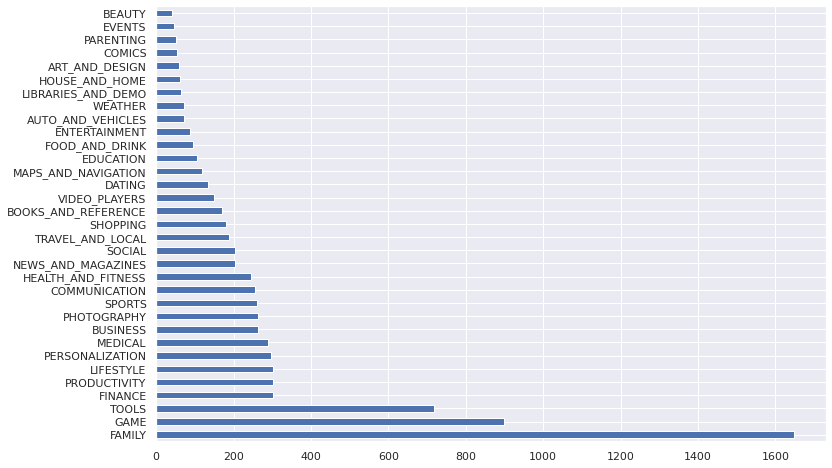

In [233]:
data.Category.value_counts().plot(kind='barh',figsize= (12,8))

In [234]:
#Insight : Maximum Number of Apps belong to the Family and Game Category.

 Rating

In [235]:
data.Rating.describe()

count    8190.000000
mean        4.173346
std         0.536319
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

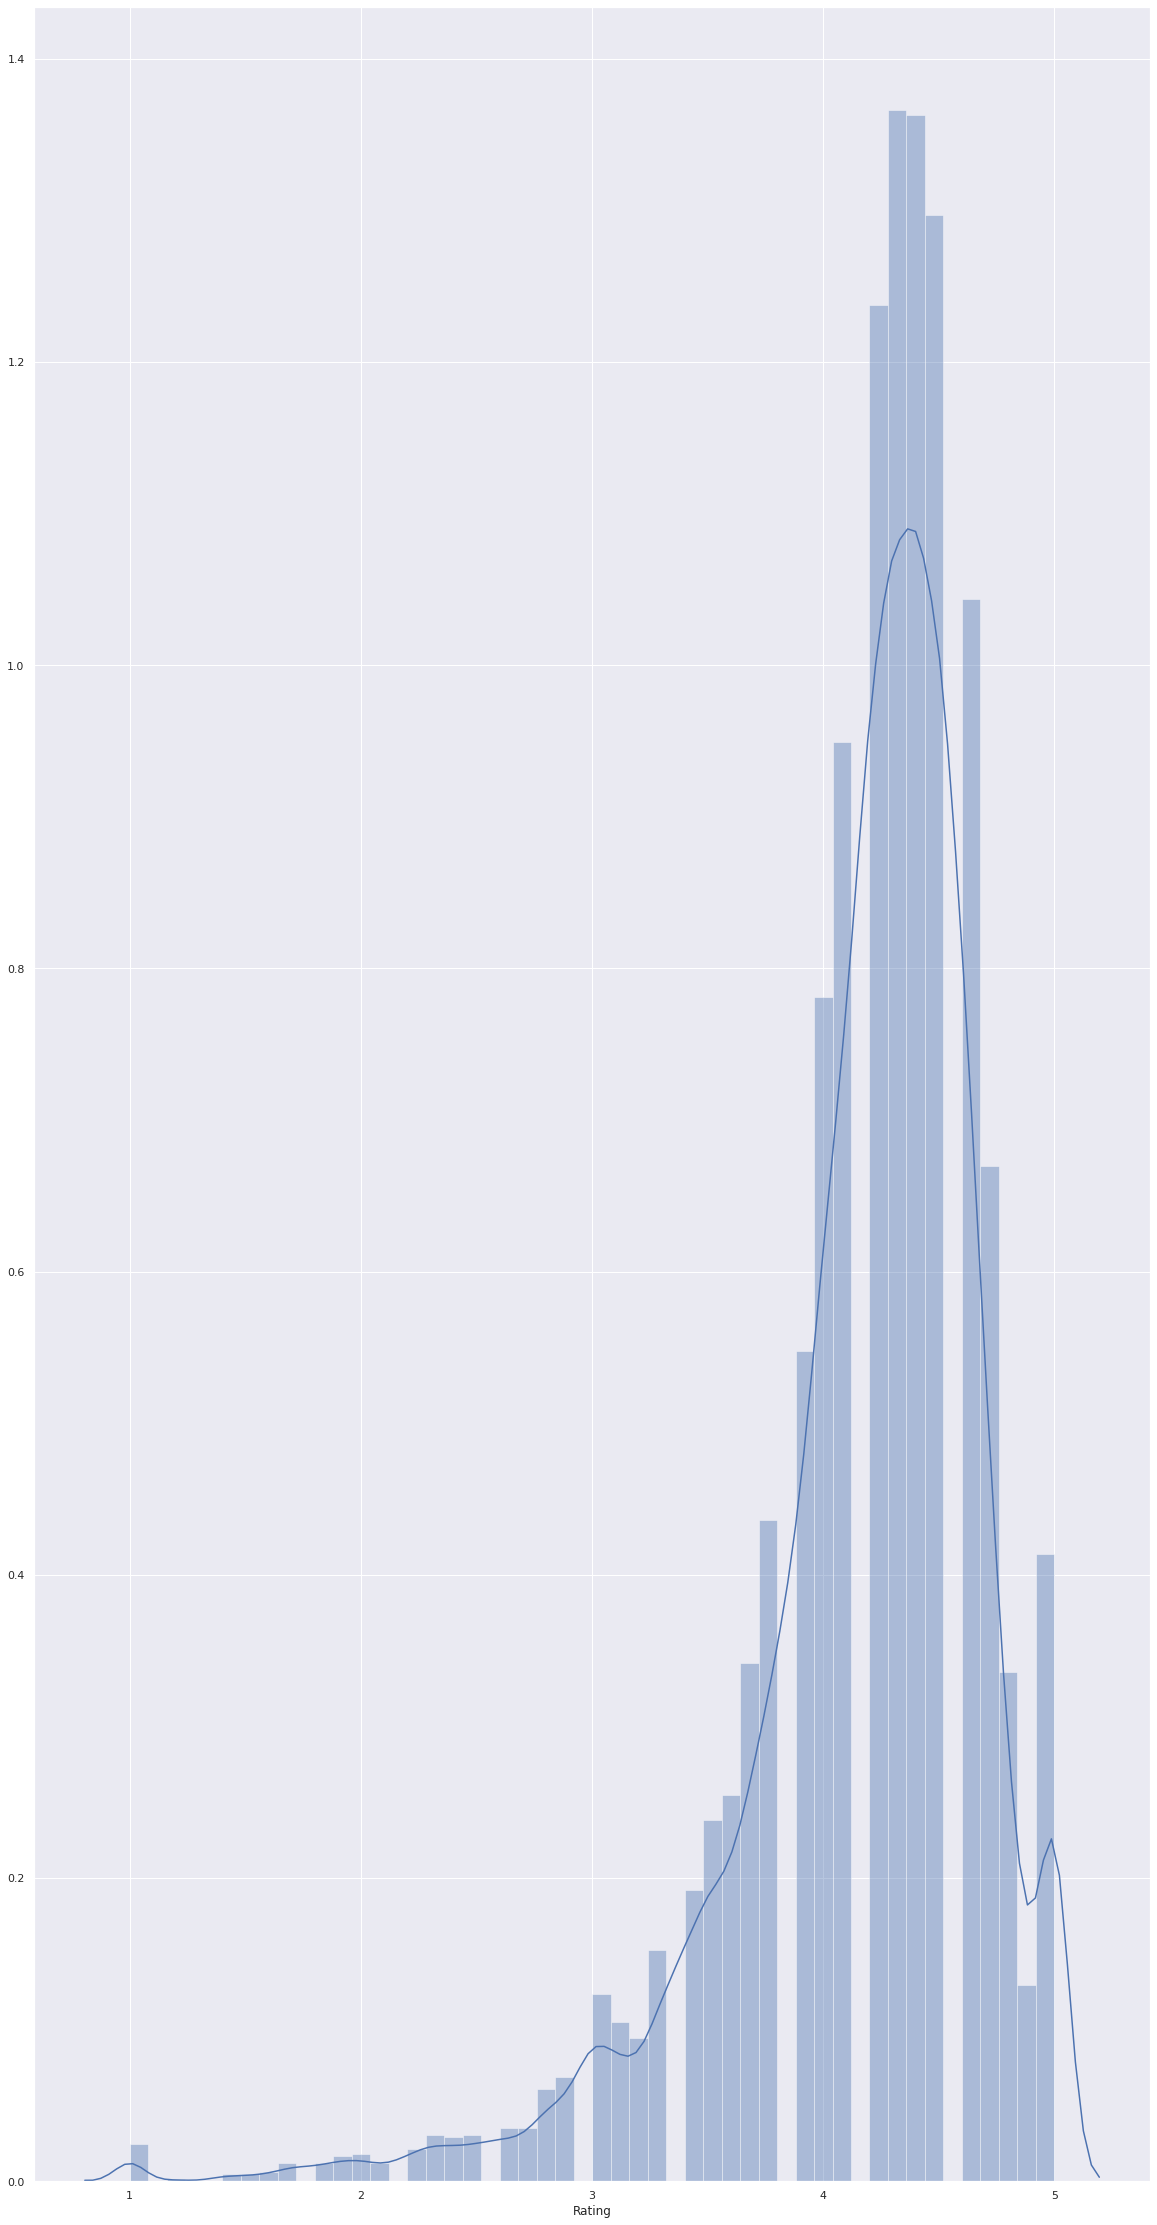

In [236]:
sns.distplot(data.Rating)

In [237]:
#Insight : Most of the apps, clearly hold a rating above 4.0 ! And surprisingly a lot seem to have 5.0 rating.

Reviews

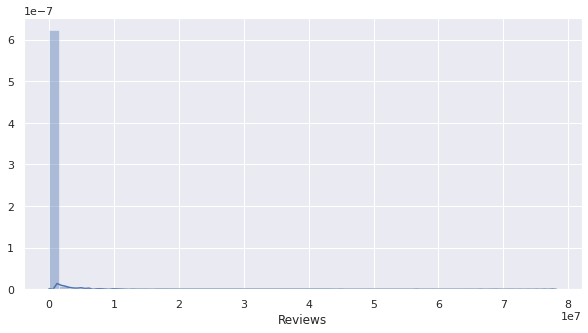

In [238]:
plt.figure(figsize=(10,5))
sns.distplot(data.Reviews)

In [239]:
data[data.Reviews>40000000]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,0.0,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,0.0,500000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up


In [240]:
#Insight : The most famous Apps like WhatsApp, Facebook and Clash of Clans are the most reviewed Apps as shown above.

Type

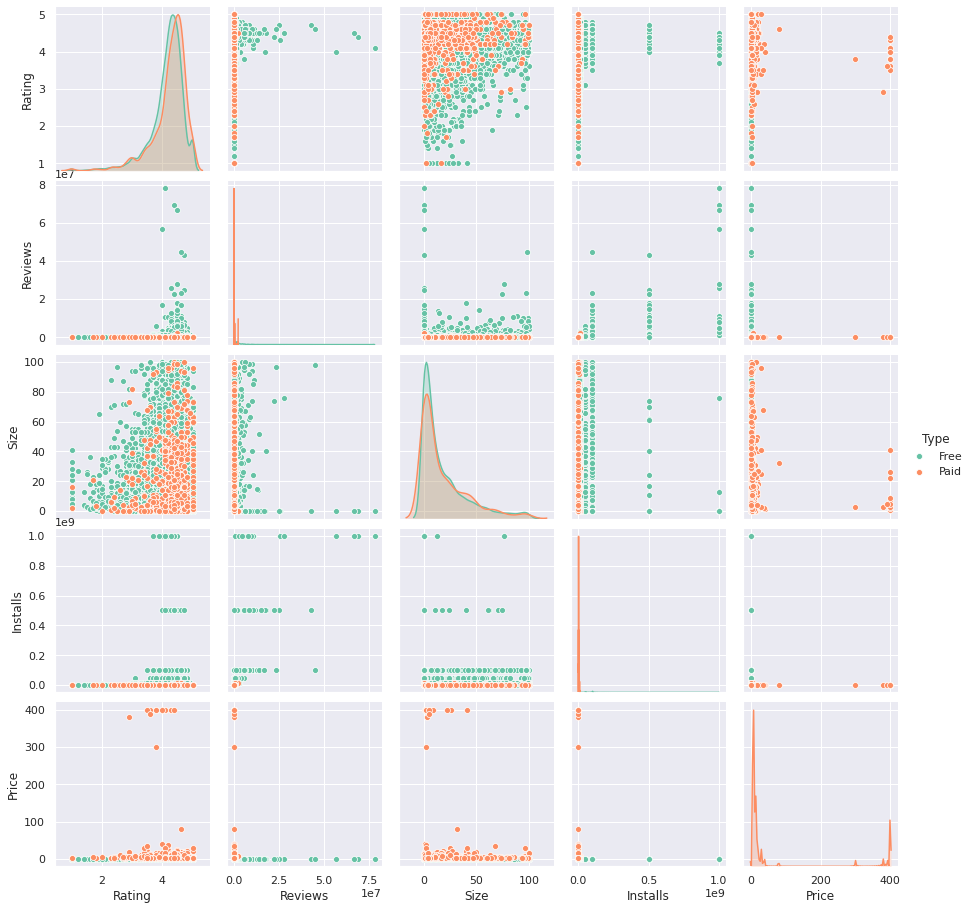

In [241]:
sns.pairplot(data,hue = 'Type', palette='Set2')

percentage of paid to free apps

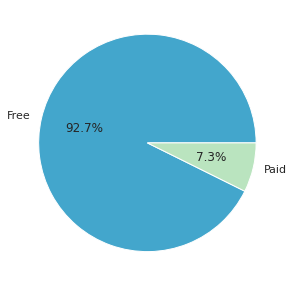

In [242]:
plt.rcParams['figure.figsize']=(5,5)
size = data["Type"].value_counts()
labels = data["Type"].unique()
colors=["#43a6cc", "#bae4bf"]

plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

In [243]:
#Insight: 93% of the Apps are Free in the Play Store.

Price

In [244]:
expensive_apps = data[data["Price"]>100]
expensive_apps["Installs"].groupby(data["App"]).sum()

App
I AM RICH PRO PLUS                  1000
I Am Rich                          10000
I Am Rich Premium                  50000
I Am Rich Pro                       5000
I am Rich                           5000
I am Rich Plus                     10000
I am Rich!                          1000
I am extremely Rich                 1000
I am rich                         100000
I am rich (Most expensive app)      1000
I am rich VIP                      10000
I am rich(premium)                  5000
I'm Rich - Trump Edition           10000
most expensive app (H)               100
💎 I'm rich                         10000
Name: Installs, dtype: int64

In [245]:
data[data.Price == data.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up


In [246]:
#Insight : The most costly App in the Store is: I'm Rich - Trump Edition costing 400 Dollars!

Android Version

In [247]:
data['Android Ver'].value_counts()

4.1 and up            1814
4.0.3 and up          1139
4.0 and up            1041
Varies with device     948
4.4 and up             713
2.3 and up             545
5.0 and up             447
4.2 and up             315
2.3.3 and up           232
2.2 and up             203
3.0 and up             200
4.3 and up             185
2.1 and up             112
1.6 and up              87
6.0 and up              42
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

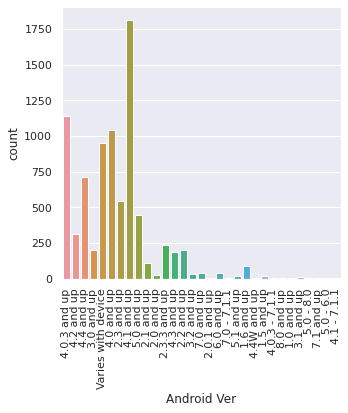

In [248]:
sns.countplot(data['Android Ver'])
plt.xticks(rotation=90)

In [249]:
#Insight : Most of the apps support Android 4.0 and above.

Scatter Matrix

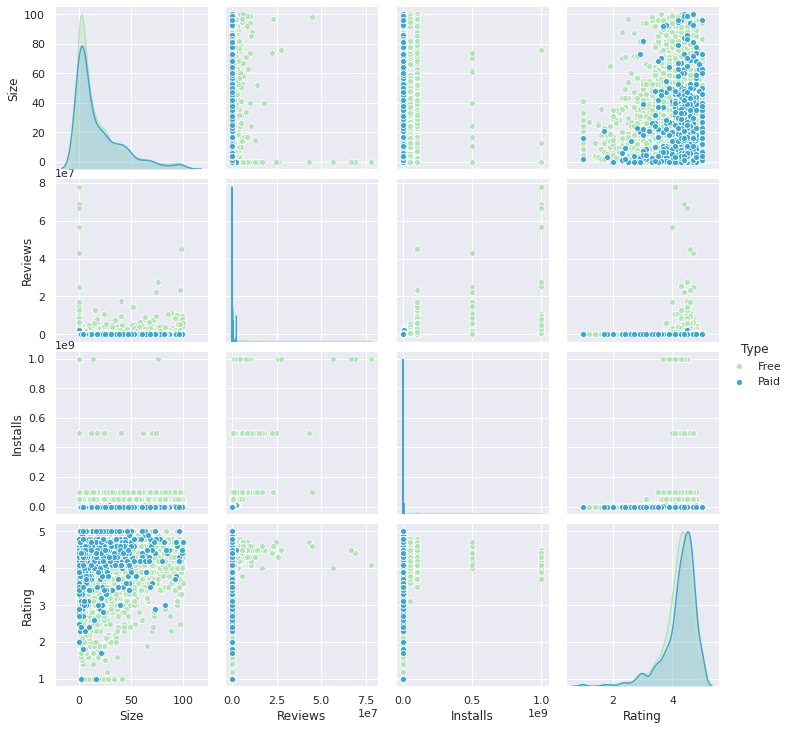

In [250]:
sns.pairplot(data[["Size", "Reviews", "Installs", "Rating", "Type"]], hue="Type", palette="GnBu")

In [251]:
# This matches our assumption that size greatly affects other features.
#  The Scatter Matrix shows that when the app size is relatively small, 
#  other features prosper. This shows that cosumer behaviour on the play 
#  store is greatly affected by the app download size.

# Takeaway: Developers should optimize their app download size as much as possible.

Obtaining the optimal app size

18.661324725274685

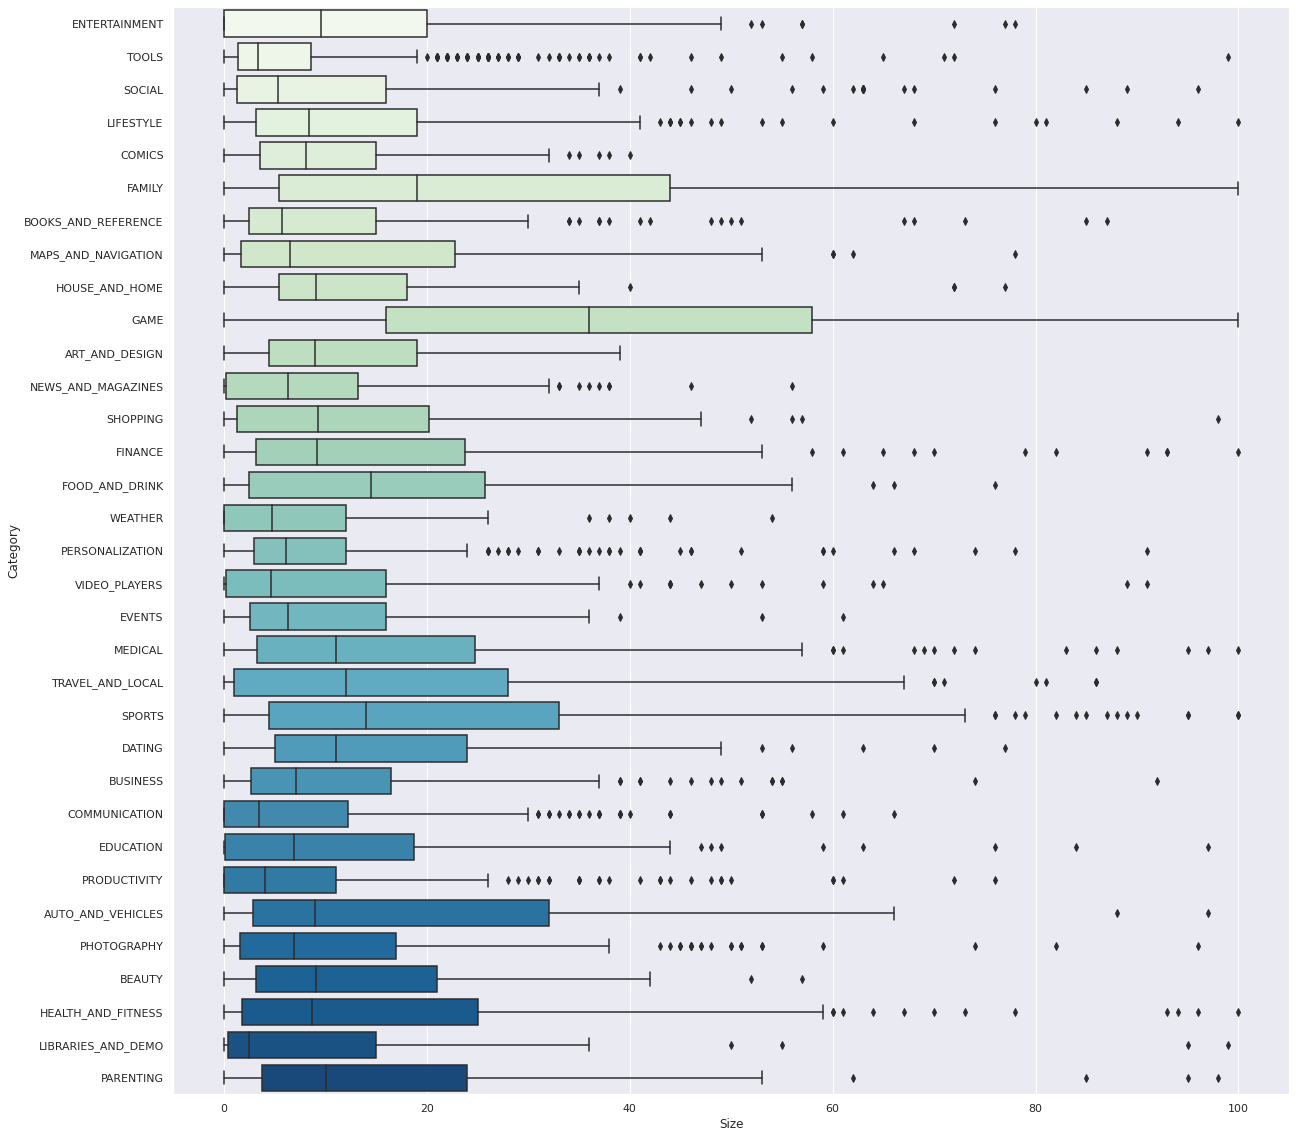

In [252]:
plt.rcParams['figure.figsize']=(20,20)
medians = data.groupby(['Category'])['Size'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
ax = sns.boxplot(x="Size", y="Category", data=data, palette="GnBu")
data["Size"].mean()

In [253]:
# The trend is games have a much larger download size than any other category. 
# If you're developing anything other than a game, you need to optimize your
#  downlaod size. on Average any app should have a size of 17.8 MB.

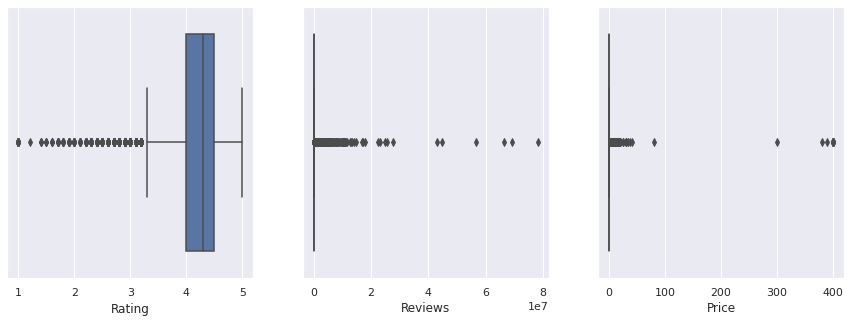

In [254]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.boxplot(x='Rating',data=data,ax=ax1)
sns.boxplot(x='Reviews',data=data,ax=ax2)
sns.boxplot(x='Price',data=data,ax=ax3)
f.set_size_inches(15, 5)

obtaining the most dominant category

Text(0.5, 1.0, 'Count of the different categories')

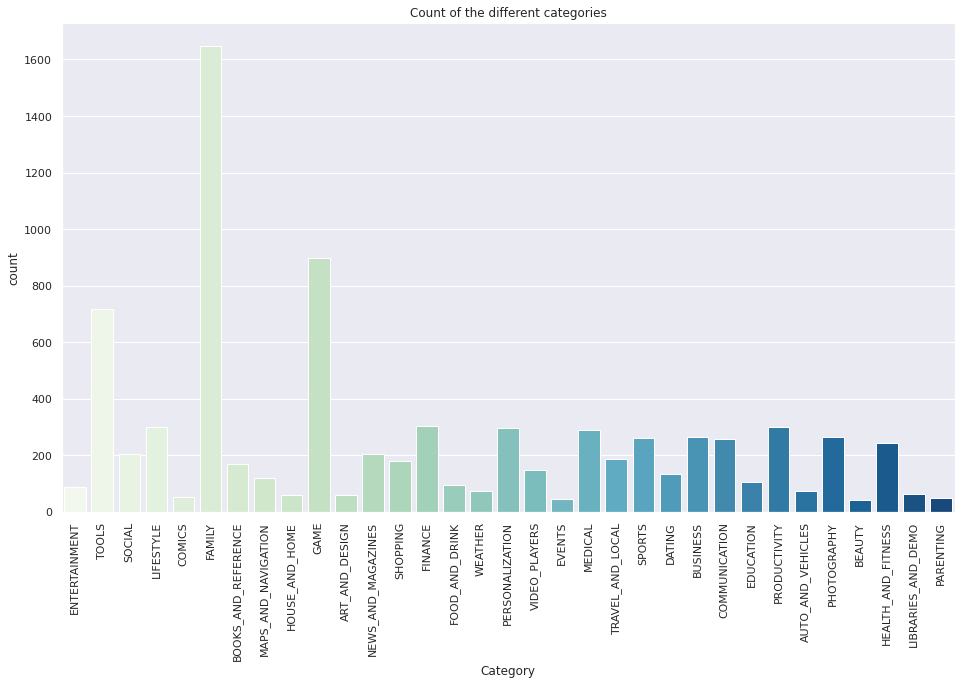

In [255]:
plt.figure(figsize=(16,9))
g=sns.countplot(x='Category', data=data, palette="GnBu")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Count of the different categories')

In [256]:
# This is an interesting finding, our first assumption for the most 
# dominant category was games.

obtaining the optimal price an app should be

1.0359023199023127

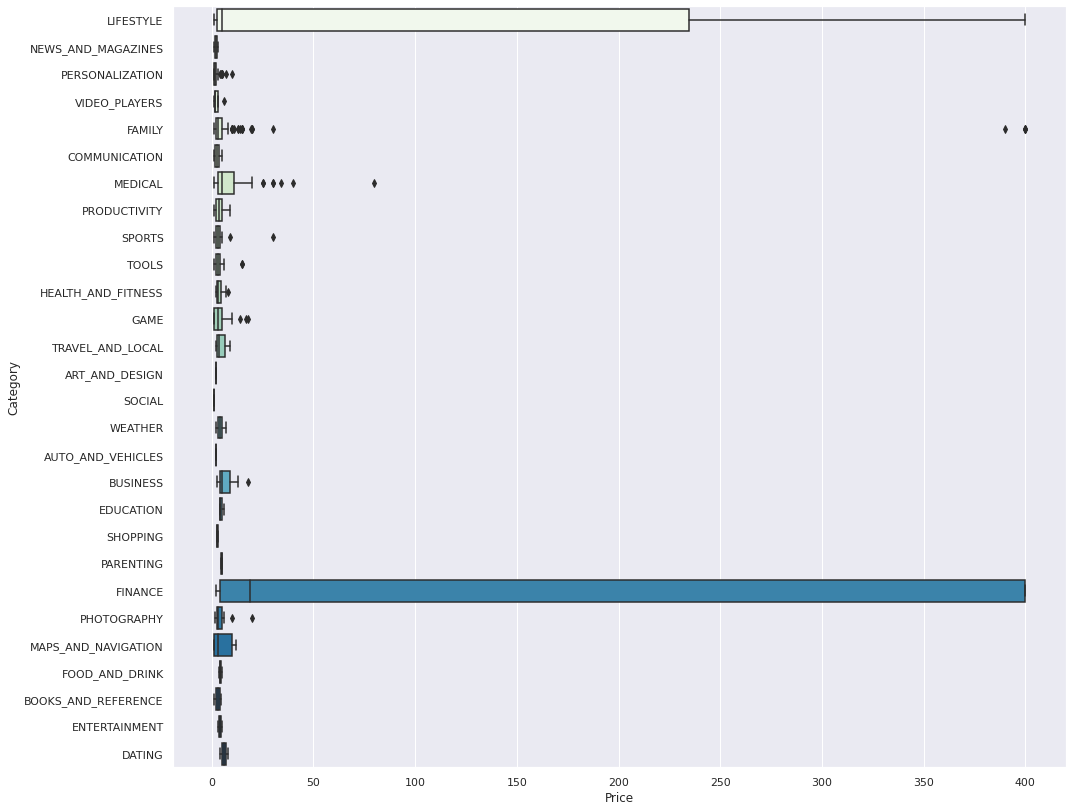

In [257]:
plt.figure(figsize=(16,14))
paid_apps = data[data["Type"] == "Paid"]
sns.boxplot(x="Price", y="Category", data=paid_apps, palette="GnBu")
data["Price"].mean()

In [258]:
# Finance and lifestyle are valued the most but it's intresting to find that
#  there are apps with values of more than \$100. On average an app price is $1.

Obtaining the number of installs for apps priced more than $100

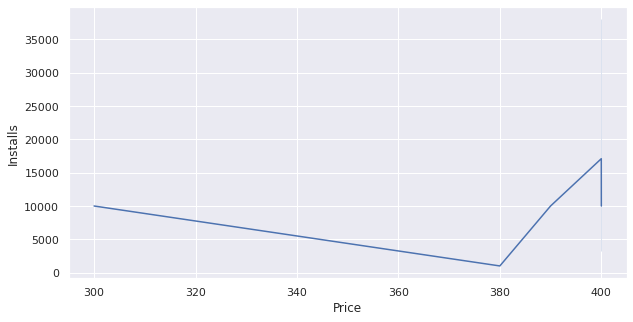

In [259]:
plt.rcParams['figure.figsize']=(10,5)
expensive_apps = data[data["Price"] > 100]
sns.lineplot(x="Price", y="Installs", data=expensive_apps, palette="GnBu")

In [260]:
# There are only 20 apps values of more than $100.
#  However, the number of installs can get as high as 15k Downloads.

What is the most successful category

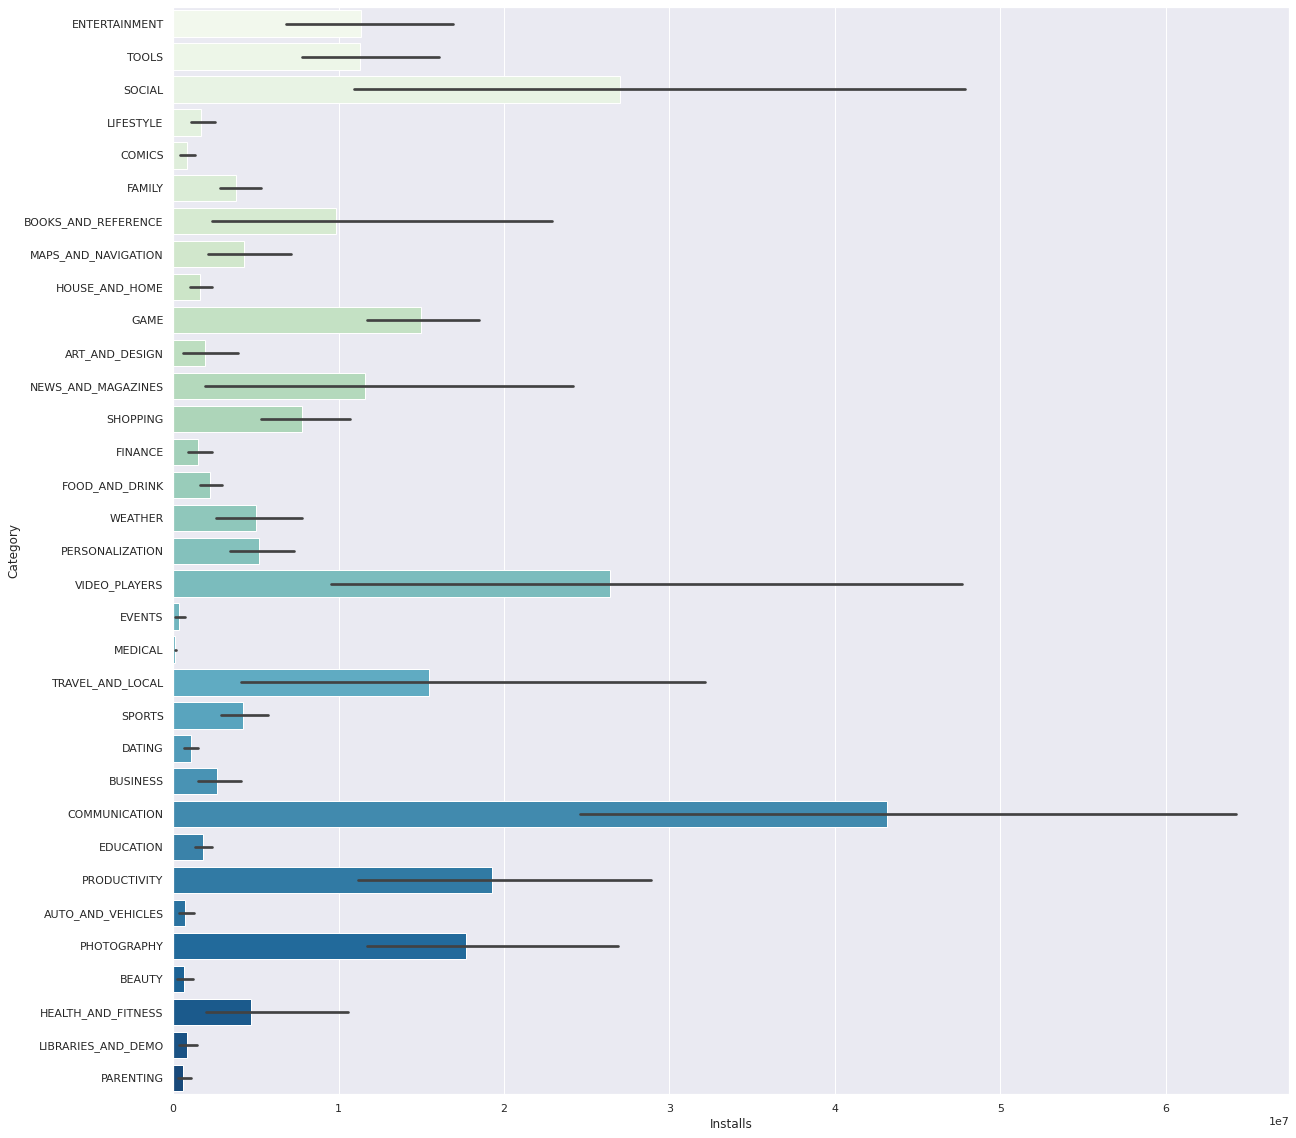

In [261]:
plt.rcParams['figure.figsize']=(20,20)
plot = sns.barplot(x="Installs", y="Category", data=data, palette="GnBu")

In [262]:
# Most successful category based on the number of installs
#  is the communication category

Distribution of app sizes

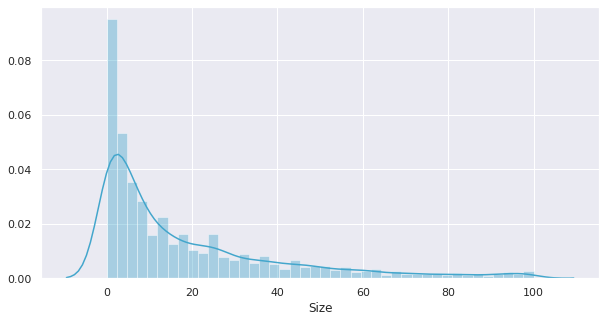

In [263]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(data["Size"], color="#43a6cc")

Rating per categories and type

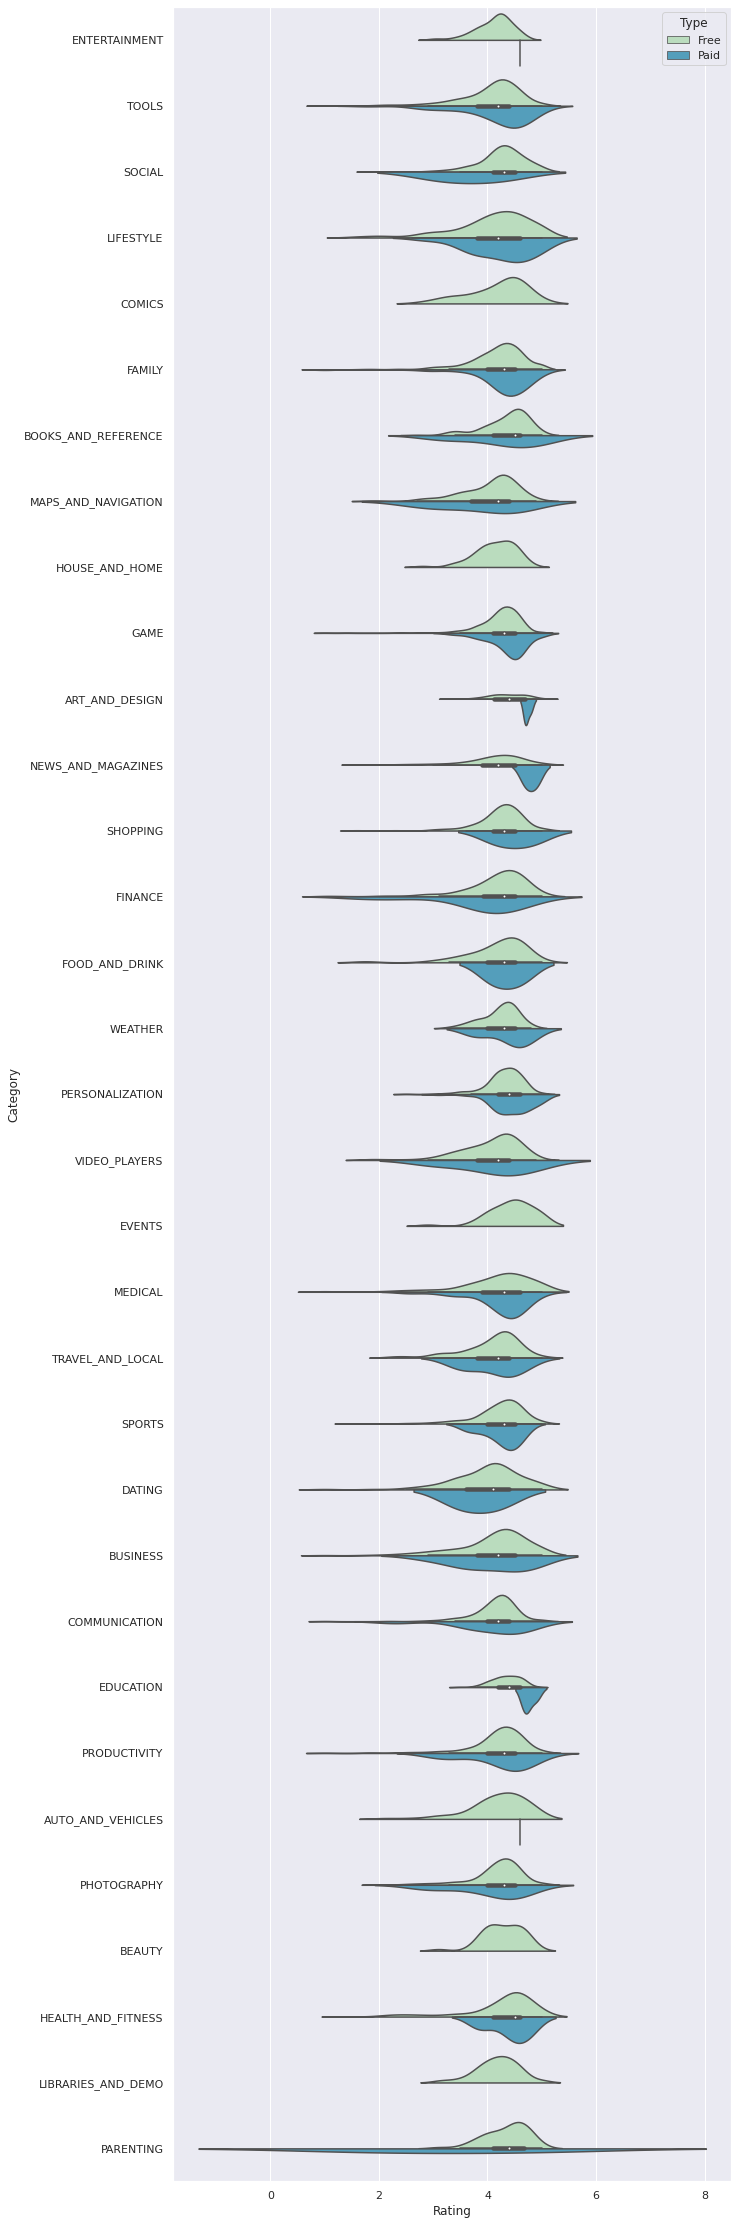

In [264]:
plt.rcParams['figure.figsize']=(10,40)
sns.violinplot(x="Rating", y="Category", hue="Type", data=data, split=True, palette="GnBu")

Distribution of content rating per categories

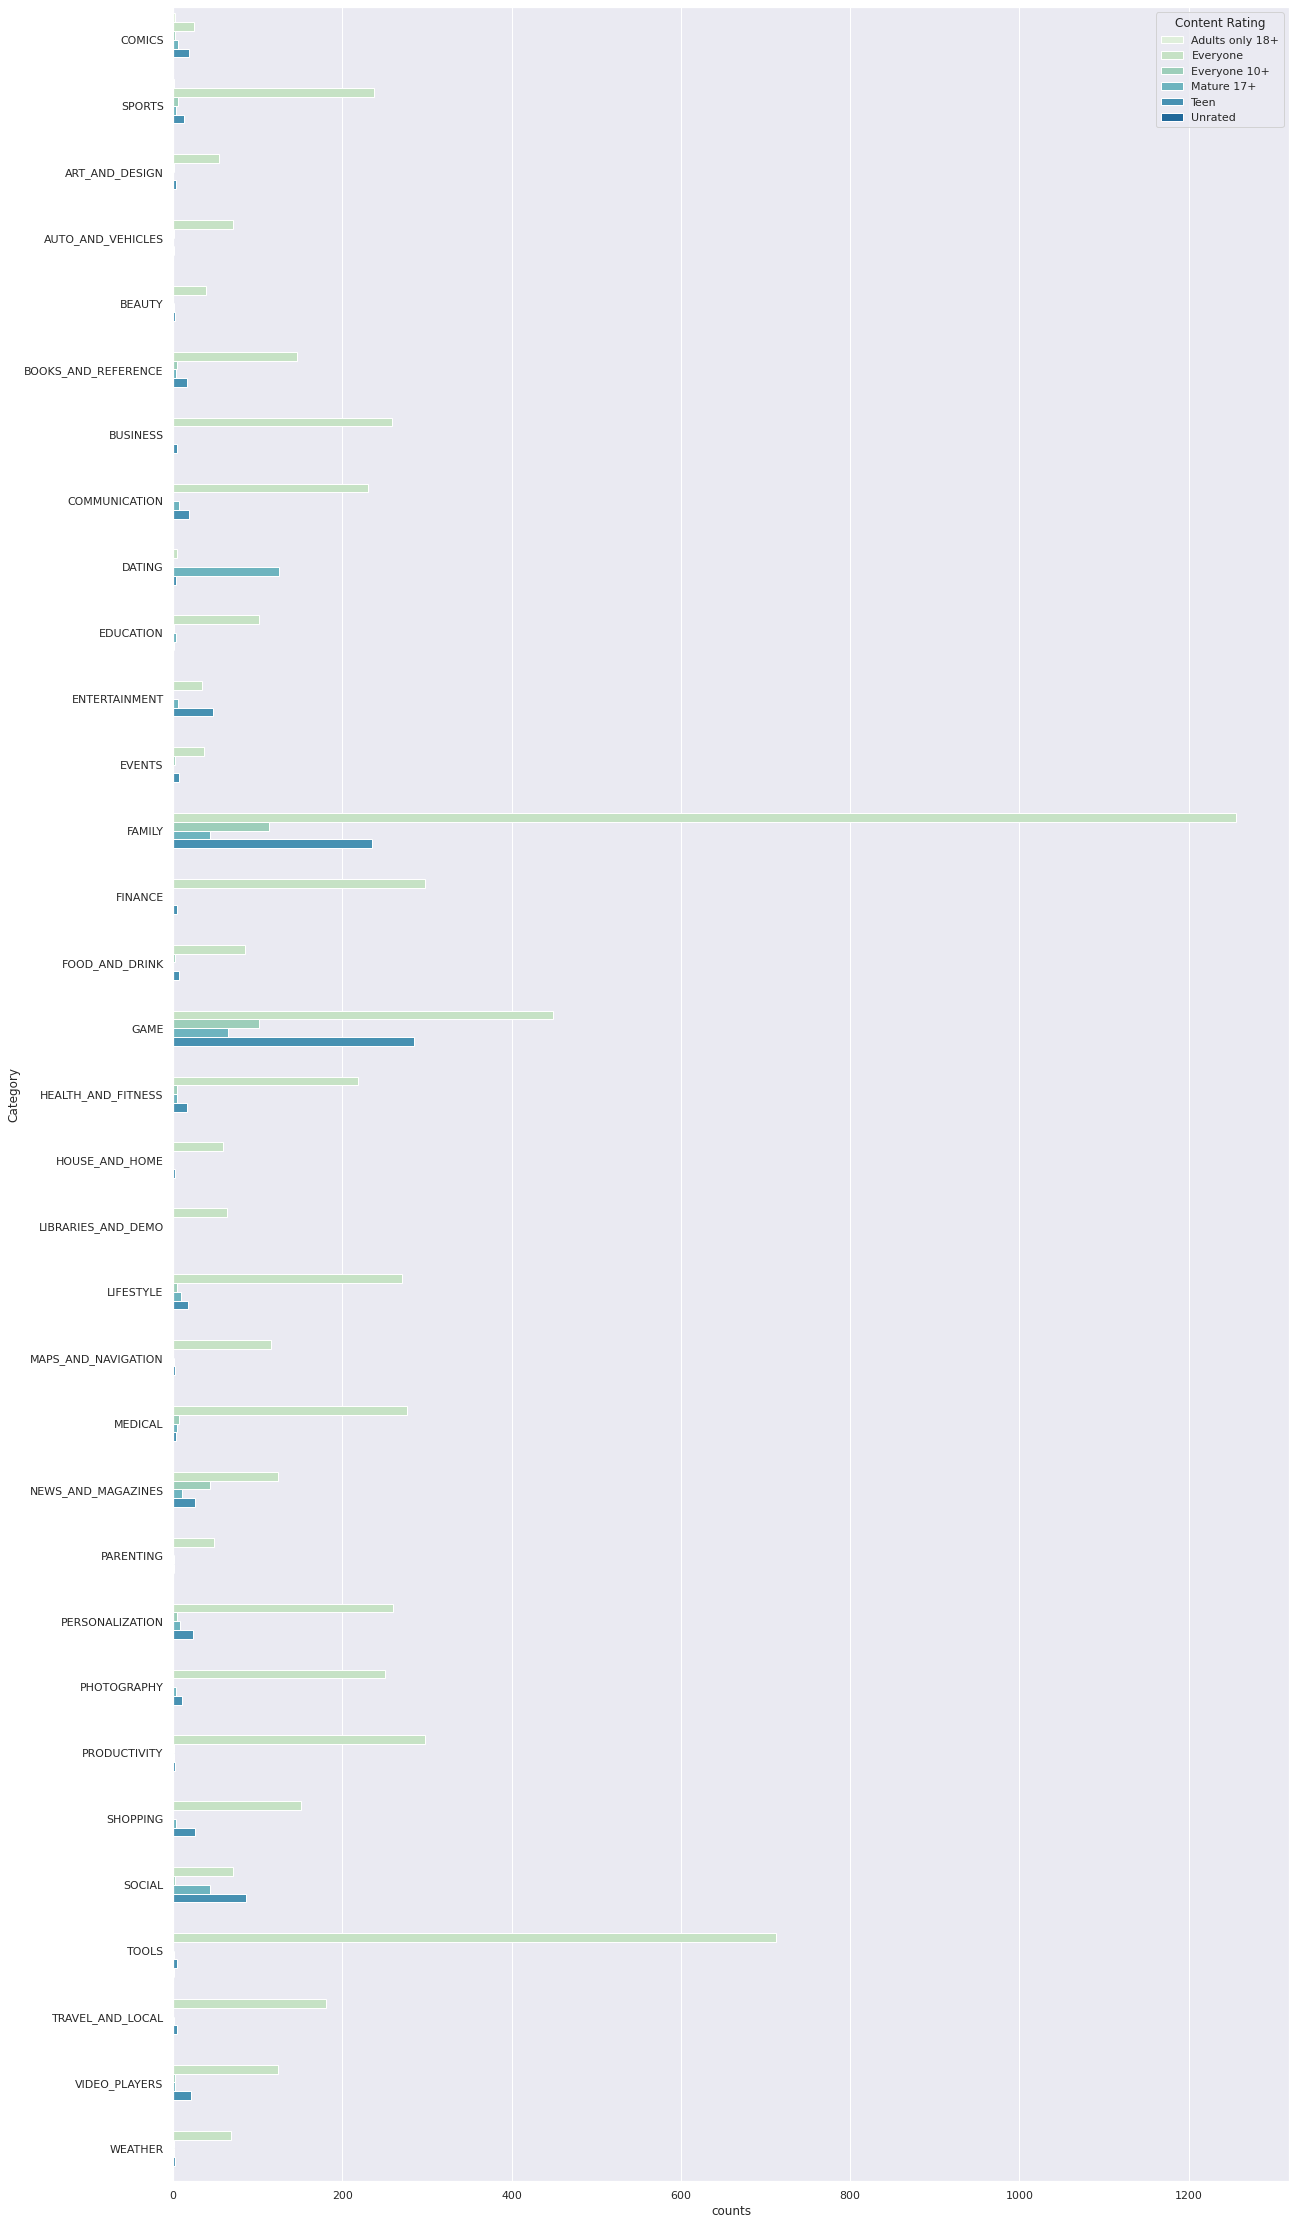

In [265]:
plt.rcParams['figure.figsize']=(20,40)
content_category = data[["Content Rating", "Category"]].groupby(["Content Rating", "Category"]).size().reset_index(name='counts')
sns.barplot(x="counts" , y="Category", hue="Content Rating",data=content_category, palette="GnBu")

Text(0.5, 1.0, 'Categorical spread of ratings')

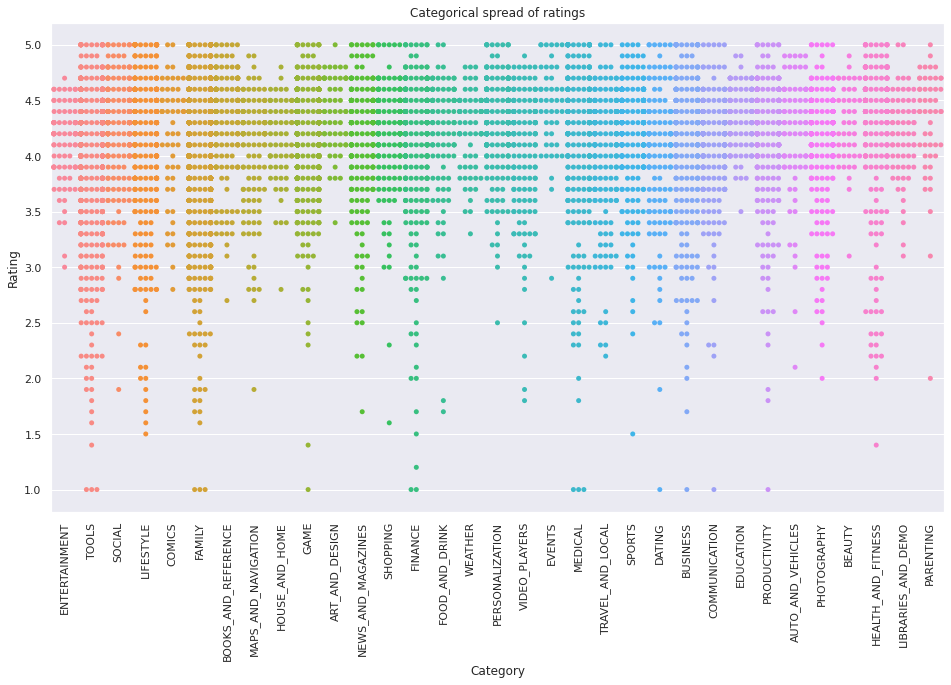

In [266]:
plt.figure(figsize=(16,9))
g=sns.swarmplot(x='Category',y='Rating',data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Categorical spread of ratings')

In [267]:
data["Reviews"].describe()

count    8.190000e+03
mean     2.556849e+05
std      1.986425e+06
min      1.000000e+00
25%      1.270000e+02
50%      3.020000e+03
75%      4.405325e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Text(0.5, 1.0, 'Distribution of Reviews')

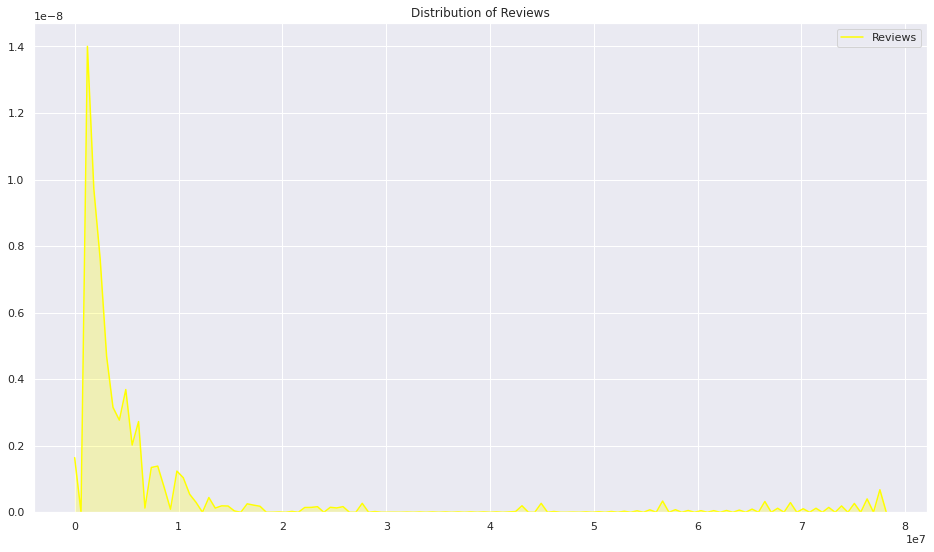

In [268]:
plt.figure(figsize=(16,9))
graph=sns.kdeplot(data["Reviews"],shade=True,color="Yellow")
g.set_xlabel("Number of reviews")
g.set_ylabel("Frequency")
plt.title("Distribution of Reviews")

In [269]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4.0,1000000,Free,0.00,Everyone,Entertainment,2018-07-14,1.1.3.2,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2,10000,Free,0.00,Everyone,Tools,2017-10-21,1.0,4.2 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18.0,1000000,Free,0.00,Everyone,Social,2018-07-24,4.2.4,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
6420,감성학원 BL 첫사랑,COMICS,4.4,190,34.0,10000,Free,0.00,Everyone,Comics,2017-11-17,3.2.1,3.0 and up


In [270]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [271]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [272]:
# Removing irrelevant features
data = data.drop(['App','Last Updated','Current Ver','Android Ver'],axis='columns')
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
882,ENTERTAINMENT,4.7,11661,4.0,1000000,Free,0.00,Everyone,Entertainment
7559,TOOLS,4.0,19,3.2,10000,Free,0.00,Everyone,Tools
2575,SOCIAL,4.6,22098,18.0,1000000,Free,0.00,Everyone,Social
4362,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle
6420,COMICS,4.4,190,34.0,10000,Free,0.00,Everyone,Comics


#Data Preprocessing for Classification

In [273]:
data_class = data.copy()

In [274]:
#Cleaning of content rating classification
RatingL = data_class['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
data_class['Content Rating'] = data_class['Content Rating'].map(RatingDict).astype(int)

In [275]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

data_class['Type'] = data_class['Type'].map(type_cat)

In [276]:
# Genres features encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data_class['Genres'] = le.fit_transform(data_class['Genres'])

In [277]:
# Category features encoding
category_list = data_class['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
data_class = pd.concat([data_class, pd.get_dummies(data_class['Category'], prefix='cat')], axis=1)

In [278]:
data_class.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
882,ENTERTAINMENT,4.7,11661,4.0,1000000,0,0.00,0,49,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7559,TOOLS,4.0,19,3.2,10000,0,0.00,0,104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2575,SOCIAL,4.6,22098,18.0,1000000,0,0.00,0,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4362,LIFESTYLE,3.8,718,26.0,10000,1,399.99,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6420,COMICS,4.4,190,34.0,10000,0,0.00,0,31,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##CLASSIFICATION
predicting the Genre from other parameters

In [279]:
# Split data into training and testing sets
features2 = ['Reviews', 'Size', 'Installs', 'Type', 'Price',
             'Content Rating', 'Rating']
features2.extend(category_list)
X2 = data_class[features2]
y2 = data_class['Genres']

In [280]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2,test_size=0.2,random_state =40)

In [281]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

##Decision Tree

In [282]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 40)
classifier.fit(X_train_2, y_train_2)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [283]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_2)
cm = confusion_matrix(y_test_2,y_pred)
print(cm)
acc_tree = accuracy_score(y_test_2, y_pred)
print('The accuracy of the Decision tree is', acc_tree)

[[27  0  4 ...  0  0  1]
 [ 0  1  0 ...  0  0  0]
 [ 8  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0  0]]
The accuracy of the Decision tree is 0.7545787545787546


###Random Forest

In [284]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [285]:
# from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_2)
cm = confusion_matrix(y_test_2,y_pred)
print(cm)
acc_forest = accuracy_score(y_test_2,y_pred)
print('The accuracy of the Random Forest is', acc_forest)

[[36  0  6 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [10  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0  0]]
The accuracy of the Random Forest is 0.7686202686202687


###SVM

In [286]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC() 
svc.fit(X_train_2,y_train_2)
y_pred=svc.predict(X_test_2)
acc_svm =accuracy_score(y_test_2, y_pred)

# compute and print accuracy score
print('Model accuracy score of SVM is', acc_svm)

Model accuracy score of SVM is 0.7851037851037851


###SVM with linear kernel

In [287]:
#Run SVM with linear kernel and C=1.0
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train_2,y_train_2)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test_2)
acc_svm_linear =accuracy_score(y_test_2, y_pred)


# compute and print accuracy score
print('Model accuracy score of SVM with linear kernel is', acc_svm_linear)


Model accuracy score of SVM with linear kernel is 0.7851037851037851


###Naïve Bayes

In [288]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_2, y_train_2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [289]:
# from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_2)
cm = confusion_matrix(y_test_2,y_pred)
print(cm)
acc_naive = accuracy_score(y_test_2,y_pred)
print('The accuracy of the Naive Bayes is', acc_naive)

[[ 0  0  2 ...  0  0 14]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0  1]]
The accuracy of the Naive Bayes is 0.6642246642246642


###Logistic Regression

In [290]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [291]:
# from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_2)
cm = confusion_matrix(y_test_2,y_pred)
print(cm)
acc_log = accuracy_score(y_test_2,y_pred)
print('The accuracy of the Logistic Regression is', acc_log)

[[51  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 8  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0  0]]
The accuracy of the Logistic Regression is 0.7844932844932845


###K-Nearest Neighbors (K-NN)

In [292]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_2, y_train_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [293]:
# from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_2)
cm = confusion_matrix(y_test_2,y_pred)
print(cm)
acc_knn = accuracy_score(y_test_2,y_pred)
print('The accuracy of the K-Nearest Neighbors is', acc_knn)

[[45  0  2 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 9  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0  0]]
The accuracy of the K-Nearest Neighbors is 0.7698412698412699


###XGBoost Classifier

In [294]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_2, y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [295]:
# from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_2)
cm = confusion_matrix(y_test_2,y_pred)
print(cm)
acc_xg = accuracy_score(y_test_2,y_pred)
print('The accuracy of the XG Boost is', acc_xg)

[[48  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 9  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0  0]]
The accuracy of the XG Boost is 0.7857142857142857


#Data Preprocessing for Regression

In [296]:
data_reg = data.copy()

In [297]:
# Convert String values to Numerical - Category, Type, Content Rating, Genres
from sklearn.preprocessing import LabelEncoder


lblencoder=LabelEncoder()
data_reg['Category']=lblencoder.fit_transform(data_reg['Category'])
data_reg['Genres']=lblencoder.fit_transform(data_reg['Genres'])
data_reg['Content Rating']=lblencoder.fit_transform(data_reg['Content Rating'])
data_reg['Type']=lblencoder.fit_transform(data_reg['Type'])

In [298]:
model_results=[]
def runModel(model, x_tr, x_te, y_tr, y_te,model_name):
    model.fit(x_tr,y_tr)
    r2_tr=model.score(x_tr, y_tr)
    r2_te=model.score(x_te, y_te)
    print(model_name,'- Train R2',r2_tr)
    print(model_name,'- Test R2',r2_te)

    y_predict = model.predict(x_te)
    mse=metrics.mean_squared_error(y_predict, y_te)

    rmse=np.sqrt(mse)
    print('RMSE',rmse)
    model_results.append({'Model':model_name,'Train R2':r2_tr,'Test R2':r2_te,'RMSE':rmse})
    

##REGRESSION

In [299]:
# Split data into training and testing sets
X=data_reg.drop(['Rating'],axis=1)
y=data_reg['Rating']
y=y.astype('int')

In [300]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [301]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Multiple Linear Regression 

In [302]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
y_train = lblencoder.fit_transform(y_train)
y_test = lblencoder.fit_transform(y_test)

from sklearn import metrics

runModel(linreg,X_train,X_test,y_train,y_test,'LinearRegression')

LinearRegression - Train R2 0.008495661614544403
LinearRegression - Test R2 0.0003767370723423147
RMSE 0.5837010601027096


###K-Nearest Neighbors Model


In [303]:
# Look at the 15 closest neighbors
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=15)
# Find the mean accuracy of knn regression using X_test and y_test
runModel(model,X_train,X_test,y_train,y_test,'K-NearestNeighbors')

K-NearestNeighbors - Train R2 0.12083882168527871
K-NearestNeighbors - Test R2 -0.03467582686070503
RMSE 0.5938468488264554


### Support Vector Regression

In [304]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
runModel(regressor,X_train,X_test,y_train,y_test,'SupportVectorRegression')

SupportVectorRegression - Train R2 -0.05327010012789968
SupportVectorRegression - Test R2 -0.05528864913614262
RMSE 0.599732988923204


## Decision Tree Regression

In [305]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state = 0)

runModel(regressor_tree,X_train,X_test,y_train,y_test,'DecisionTreeRegression')

DecisionTreeRegression - Train R2 0.10378350283239879
DecisionTreeRegression - Test R2 0.07796611648361118
RMSE 0.560590515087593


## Random Forest Regression

In [306]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(criterion='mse', max_depth=3, random_state = 0)

runModel(regressor_forest,X_train,X_test,y_train,y_test,'RandomForestRegression')

RandomForestRegression - Train R2 0.11599207965167346
RandomForestRegression - Test R2 0.09499467237944215
RMSE 0.5553897659203973


###Adaboost Regression

In [307]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=300,random_state=1)
runModel(abr,X_train,X_test,y_train,y_test,'AdaBoostRegressor')

AdaBoostRegressor - Train R2 0.07437851269847573
AdaBoostRegressor - Test R2 0.03909701704008495
RMSE 0.5722846215419239


###XGBoost Regressor

In [308]:
import xgboost as xgb
xgbr1=xgb.XGBRegressor(n_estimators=100,random_state=5)

runModel(xgbr1,X_train,X_test,y_train,y_test,'XGBRegressor')

[10:57:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor - Train R2 0.19917320878874456
XGBRegressor - Test R2 0.1239916131404426
RMSE 0.5464198112556063


#REGRESSION SUMMARY TABLE

In [309]:
acc = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest','SVM',
                              'SVM(linear Kernel)','Naïve Bayes','Logistic Regression',
                              'K-Nearest Neighbors (K-NN)','XGBoost Classifier'],
                    'Score': [acc_tree,acc_forest, acc_svm,acc_svm_linear, acc_naive, acc_log, acc_knn, acc_xg]})
acc.sort_values(by='Score', ascending=False)

,Model,Score
7,XGBoost Classifier,0.785714
2,SVM,0.785104
3,SVM(linear Kernel),0.785104
5,Logistic Regression,0.784493
6,K-Nearest Neighbors (K-NN),0.769841
1,Random Forest,0.768620
0,Decision Tree,0.754579
4,Naïve Bayes,0.664225


#CLASSIFICATION SUMMARY TABLE

In [310]:
dtr_df=pd.DataFrame(model_results,columns=['Model','Train R2','Test R2','RMSE'])
dtr_df

,Model,Train R2,Test R2,RMSE
0,LinearRegression,0.008496,0.000377,0.583701
1,K-NearestNeighbors,0.120839,-0.034676,0.593847
2,SupportVectorRegression,-0.053270,-0.055289,0.599733
3,DecisionTreeRegression,0.103784,0.077966,0.560591
4,RandomForestRegression,0.115992,0.094995,0.555390
5,AdaBoostRegressor,0.074379,0.039097,0.572285
6,XGBRegressor,0.199173,0.123992,0.546420
